In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading data for GAM
gam_data=pd.read_csv('data/GAM_to_model.csv')

# Removing empty columns
columns_to_drop='tvivhab tvivpar vivpar_hab vivpar_ut tvivhab tvivpar vivpar_hab vivpar_ut pct_t_inhab_hh pct_privhh pct_privhh_inhab pct_hhtemp'.split()
gam_data.drop(columns=columns_to_drop,inplace=True)

gam_data.head(2)

,id,Price_m2,tiempo,pobtot,p_0a2,p_60ymas,prom_hnv,graproes,graproes_f,pocupada,pocupada_f,pder_ss,vivtot,prom_ocup,vph_2ymasd,vph_autom,vph_pc,vph_inter,pct_0a2,pct_60,pct_wf,pct_hh_car,pct_hh_pc,pct_hh_int
0,00500010101014,747.556351,2010.0,151.0,9.0,16.0,2.45,8.55,8.24,52.0,12.0,98.0,38.0,4.03,22.0,11.0,12.0,7.0,5.960265,10.596026,23.076923,28.947368,31.578947,18.421053
1,00500010101014,747.556351,2020.0,129.0,NaN,18.0,2.21,8.84,8.47,61.0,22.0,88.0,38.0,3.39,13.0,10.0,7.0,20.0,NaN,13.953488,36.065574,26.315789,18.421053,52.631579


In [4]:
gam_data_2010=gam_data[gam_data['tiempo']==2010]
print(f"Total number of records: {len(gam_data_2010)}")
gam_data_2010.head(3)

Total number of records: 169


,id,Price_m2,tiempo,pobtot,p_0a2,p_60ymas,prom_hnv,graproes,graproes_f,pocupada,pocupada_f,pder_ss,vivtot,prom_ocup,vph_2ymasd,vph_autom,vph_pc,vph_inter,pct_0a2,pct_60,pct_wf,pct_hh_car,pct_hh_pc,pct_hh_int
0,00500010101014,747.556351,2010.0,151.0,9.0,16.0,2.45,8.55,8.24,52.0,12.0,98.0,38.0,4.03,22.0,11.0,12.0,7.0,5.960265,10.596026,23.076923,28.947368,31.578947,18.421053
2,00500010101027,10822.510823,2010.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00500010385016,5395.300000,2010.0,90.0,NaN,11.0,1.93,8.11,7.59,33.0,14.0,52.0,29.0,3.33,16.0,8.0,5.0,NaN,NaN,12.222222,42.424242,27.586207,17.241379,NaN


In [5]:
gam_data_2020=gam_data[gam_data['tiempo']==2020]
print(f"Total number of records: {len(gam_data_2020)}")
gam_data_2020.head(3)

Total number of records: 169


,id,Price_m2,tiempo,pobtot,p_0a2,p_60ymas,prom_hnv,graproes,graproes_f,pocupada,pocupada_f,pder_ss,vivtot,prom_ocup,vph_2ymasd,vph_autom,vph_pc,vph_inter,pct_0a2,pct_60,pct_wf,pct_hh_car,pct_hh_pc,pct_hh_int
1,00500010101014,747.556351,2020.0,129.0,NaN,18.0,2.21,8.84,8.47,61.0,22.0,88.0,38.0,3.39,13.0,10.0,7.0,20.0,NaN,13.953488,36.065574,26.315789,18.421053,52.631579
3,00500010101027,10822.510823,2020.0,11.0,0.0,0.0,1.57,10.64,11.14,4.0,3.0,8.0,5.0,3.67,NaN,NaN,3.0,3.0,0.0,0.000000,75.000000,NaN,60.000000,60.000000
5,00500010385016,5395.300000,2020.0,89.0,NaN,28.0,1.82,9.88,8.94,54.0,25.0,52.0,32.0,3.07,12.0,9.0,7.0,16.0,NaN,31.460674,46.296296,28.125000,21.875000,50.000000


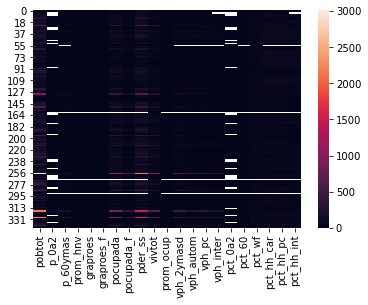

In [6]:
# How the 2010 missing values look like
#gam_data_2010.columns
sns.heatmap(gam_data_2010[['pobtot', 'p_0a2', 'p_60ymas', 'prom_hnv',
       'graproes', 'graproes_f', 'pocupada', 'pocupada_f', 'pder_ss', 'vivtot',
       'prom_ocup', 'vph_2ymasd', 'vph_autom', 'vph_pc', 'vph_inter',
       'pct_0a2', 'pct_60', 'pct_wf', 'pct_hh_car', 'pct_hh_pc', 'pct_hh_int']])

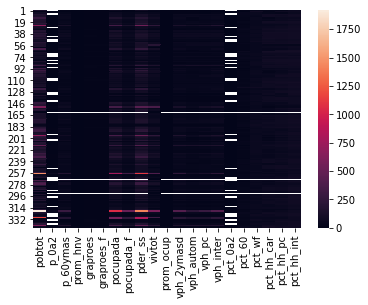

In [7]:
# How the 2020 missing values look like
#gam_data_2020.columns
sns.heatmap(gam_data_2020[['pobtot', 'p_0a2', 'p_60ymas', 'prom_hnv',
       'graproes', 'graproes_f', 'pocupada', 'pocupada_f', 'pder_ss', 'vivtot',
       'prom_ocup', 'vph_2ymasd', 'vph_autom', 'vph_pc', 'vph_inter',
       'pct_0a2', 'pct_60', 'pct_wf', 'pct_hh_car', 'pct_hh_pc', 'pct_hh_int']])

In [8]:
gam_data['Price_m2'].describe()

count    3.450000e+02
mean     3.785440e+04
std      2.343120e+05
min      7.475564e+02
25%      6.022500e+03
50%      1.264857e+04
75%      2.138132e+04
max      2.905000e+06
Name: Price_m2, dtype: float64

In [9]:
Q1_2020 = gam_data_2020['Price_m2'].quantile(0.25)
Q3_2020 = gam_data_2020['Price_m2'].quantile(0.75)
IQR_2020 = Q3_2020 - Q1_2020

print(f"2020 IQR: {IQR_2020}")

2020 IQR: 14767.669644256384


In [10]:
cl=(gam_data['Price_m2'] < (Q1_2020 - 1.5 * IQR_2020)) |(gam_data['Price_m2'] > (Q3_2020 + 1.5 * IQR_2020))
data_20=gam_data[(gam_data['tiempo']==2020)&~cl]
data_10=gam_data[(gam_data['tiempo']==2010)&~cl]

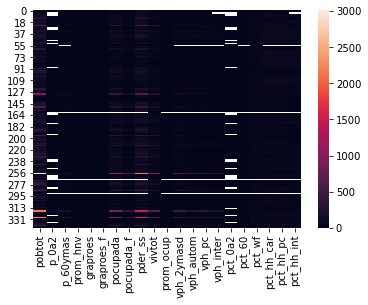

In [11]:
# How the 2010 missing values look like now
#gam_data_2010.columns
sns.heatmap(gam_data_2010[['pobtot', 'p_0a2', 'p_60ymas', 'prom_hnv',
       'graproes', 'graproes_f', 'pocupada', 'pocupada_f', 'pder_ss', 'vivtot',
       'prom_ocup', 'vph_2ymasd', 'vph_autom', 'vph_pc', 'vph_inter',
       'pct_0a2', 'pct_60', 'pct_wf', 'pct_hh_car', 'pct_hh_pc', 'pct_hh_int']])

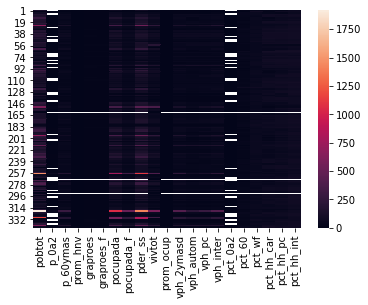

In [12]:
# How the 2020 missing values look like
#gam_data_2020.columns
sns.heatmap(gam_data_2020[['pobtot', 'p_0a2', 'p_60ymas', 'prom_hnv',
       'graproes', 'graproes_f', 'pocupada', 'pocupada_f', 'pder_ss', 'vivtot',
       'prom_ocup', 'vph_2ymasd', 'vph_autom', 'vph_pc', 'vph_inter',
       'pct_0a2', 'pct_60', 'pct_wf', 'pct_hh_car', 'pct_hh_pc', 'pct_hh_int']])

In [13]:
X=gam_data_2020.drop(columns=['Price_m2','id','tiempo'])
y=gam_data_2020.Price_m2

In [14]:
# Counting how many empty cells we have
X.isna().sum()

pobtot         0
p_0a2         62
p_60ymas      11
prom_hnv      11
graproes      11
graproes_f    11
pocupada      11
pocupada_f    11
pder_ss       11
vivtot         0
prom_ocup     11
vph_2ymasd    13
vph_autom     13
vph_pc        12
vph_inter     12
pct_0a2       62
pct_60        11
pct_wf        11
pct_hh_car    13
pct_hh_pc     12
pct_hh_int    12
dtype: int64

In [15]:
# Filling empty cells
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)

X_filled=imp.transform(X)

In [16]:
# Standarizing features
scaler = preprocessing.StandardScaler().fit(X_filled)
X_scaled = scaler.transform(X_filled)

In [17]:
# Splitting in train and try out
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.33, random_state=42)

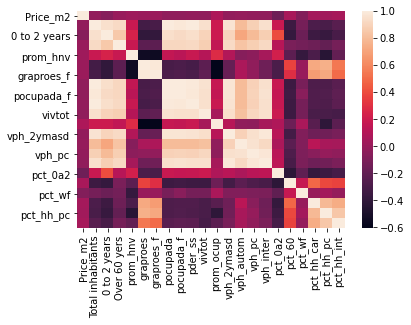

In [18]:
# Renaming the column names 
# Looking up column correlations
gam_data_2020_subset = gam_data_2020.rename(columns={
    'pobtot': 'Total inhabitants', 
    'p_0a2': '0 to 2 years', 
    'p_60ymas': 'Over 60 yers', 
    'prom_hnv': 'prom_hnv',
    'graproes': 'graproes', 
    'graproes_f': 'graproes_f', 
    'pocupada': 'pocupada', 
    'pocupada_f': 'pocupada_f', 
    'pder_ss': 'pder_ss', 
    'vivtot': 'vivtot',
    'prom_ocup': 'prom_ocup', 
    'vph_2ymasd': 'vph_2ymasd', 
    'vph_autom': 'vph_autom', 
    'vph_pc' : 'vph_pc', 
    'vph_inter': 'vph_inter',
    'pct_0a2': 'pct_0a2', 
    'pct_60': 'pct_60', 
    'pct_wf': 'pct_wf', 
    'pct_hh_car': 'pct_hh_car', 
    'pct_hh_pc': 'pct_hh_pc', 
    'pct_hh_int': 'pct_hh_int'
})

gam_data_2020_subset = gam_data_2020_subset.drop(columns=['id','tiempo'])

sns.heatmap(gam_data_2020_subset.corr())

In [19]:
gbr = GradientBoostingRegressor(
learning_rate=0.1,
n_estimators=200,
subsample=0.6,
random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42, subsample=0.6)

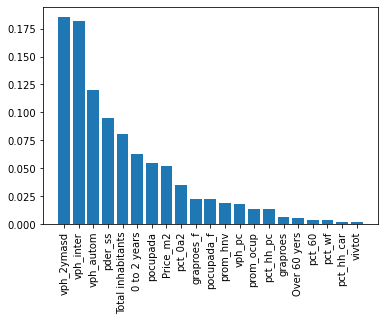

In [20]:
# feature importances from random forest model
importances = gbr.feature_importances_
# index of greatest to least feature importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
# create tick labels
feature_names=list(gam_data_2020_subset)
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [21]:
X_10=gam_data_2010.drop(columns=['Price_m2','id','tiempo'])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_10)

X_10=imp.transform(X_10)

pd.DataFrame({'Price for m2 2010 predicted':gbr.predict(X_10),
              'Price for m2 2020':y,
              'Ratio':100*(y/gbr.predict(X_10))-100})

,Price for m2 2010 predicted,Price for m2 2020,Ratio
1,-102286.958763,7.475564e+02,-100.730842
3,19092.518763,1.082251e+04,-43.315437
5,2031.314499,5.395300e+03,165.606335
7,6336.066077,1.139500e+04,79.843403
9,16349.672861,4.777778e+03,-70.777533
11,19421.187543,9.375000e+03,-51.727978
13,-58828.327555,1.143309e+04,-119.434668
15,13022.704590,1.088328e+04,-16.428414
17,-54528.455276,7.702350e+03,-114.125377
19,21809.416242,3.538462e+04,62.244670


In [22]:
change=100*(y/gbr.predict(X_10))-100
print(change.mean())
print(change.max())

176.59453667502788
20065.38303279543


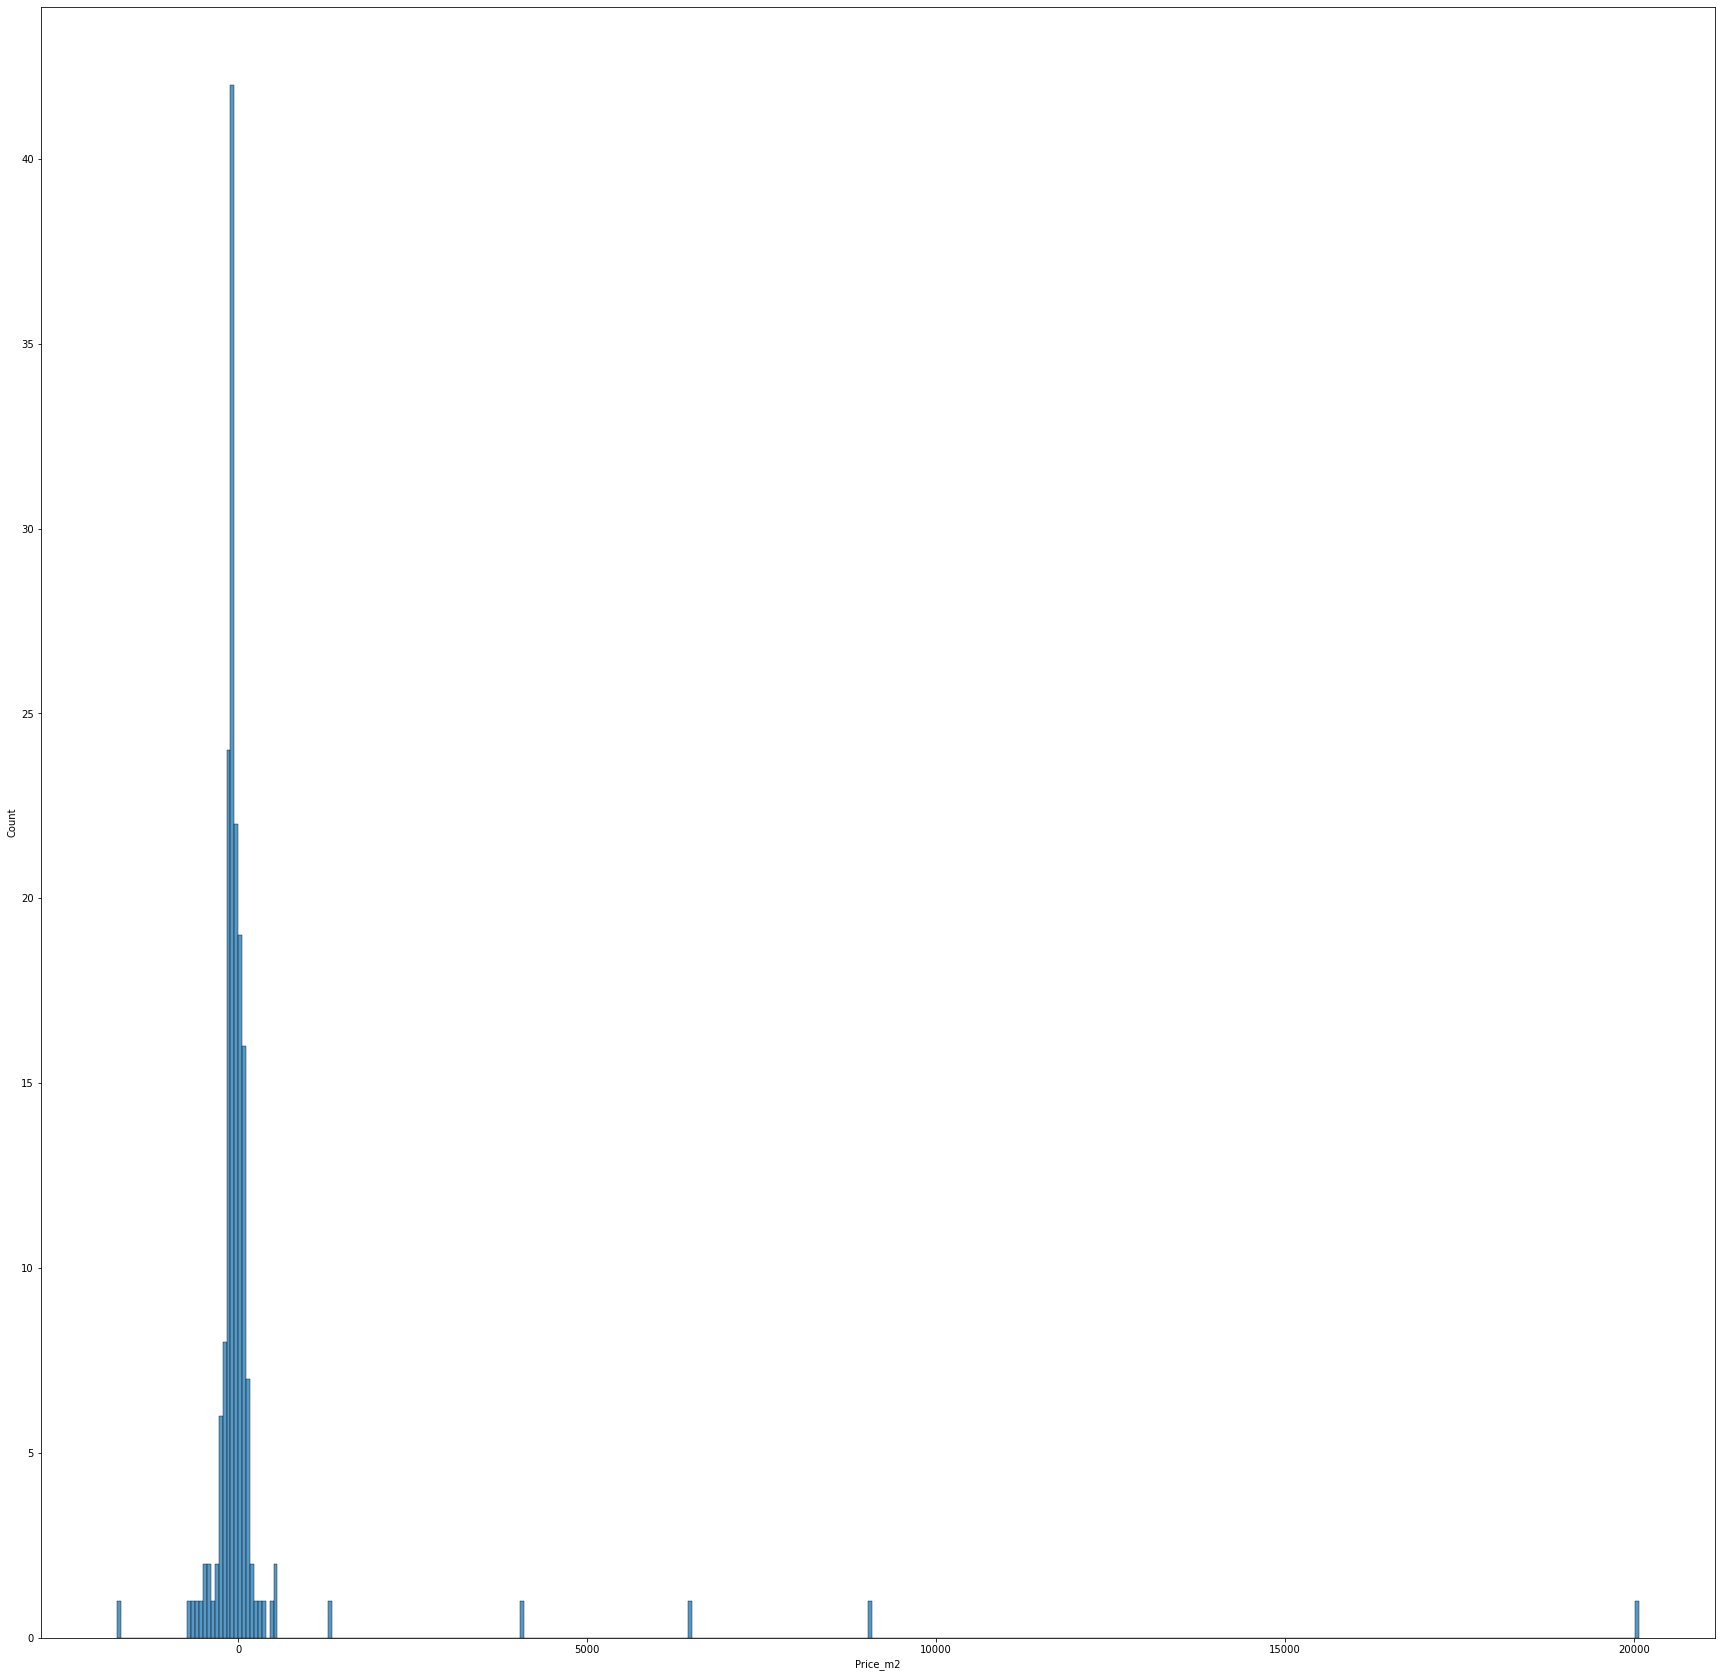

In [26]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.histplot(change)